In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

from scipy.spatial.distance import cdist

In [2]:
import cvxopt
matrix = cvxopt.matrix
solvers = cvxopt.solvers

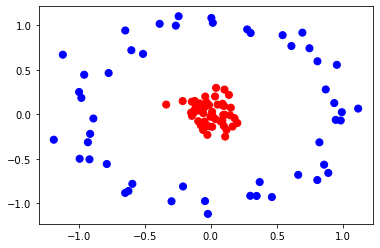

In [3]:
from sklearn.datasets._samples_generator import make_circles
X,y = make_circles(100,factor=.1, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=50,cmap='bwr')


In [4]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.20)

# Applying linear kernal on non linear data

In [5]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


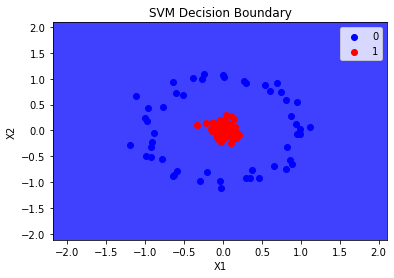

In [8]:
plot_decision_boundary(X, y, classifier)

#  Transforming the data into 3D

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1)) #radial basis function rbf kernal##z-coordinate value
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='X1', ylabel='X2'>

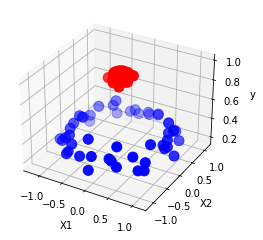

In [10]:
plot_3d_plot(X,y)

# Using the rbf kernal

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


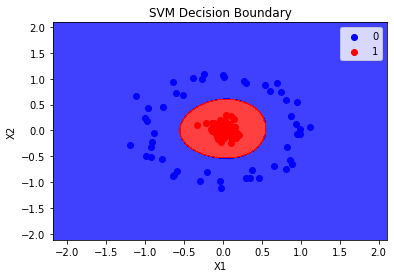

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

# Using the polynomial kernal

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


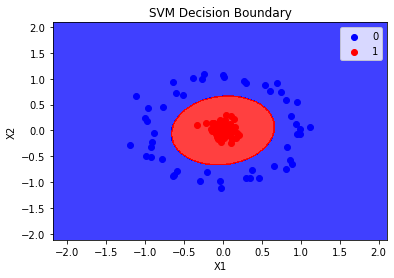

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 0.13705661,  0.21779875],
       [-0.09056641,  0.04322155],
       [ 0.46228271, -0.92821102],
       [ 0.09856722, -0.13145826],
       [-0.91863746, -0.50519416],
       [ 0.34662975, -0.91585937],
       [ 0.9540358 ,  0.55525145],
       [ 0.80729601,  0.59496385],
       [ 0.85760525, -0.56480977],
       [-0.51309642,  0.67768698],
       [-0.08305155,  0.12180588],
       [-0.09519659, -0.07740076],
       [-0.62343693, -0.86038666],
       [-0.38744519,  1.0152085 ],
       [-0.26500597,  0.99492547],
       [-0.95856972,  0.4439381 ],
       [-0.64845452, -0.88173668],
       [ 0.16471502, -0.13726691],
       [ 0.61013003,  0.76638743],
       [-0.14366855,  0.14137916],
       [-0.03139475,  0.13205331],
       [-0.02226436, -1.11736137],
       [ 0.99173095,  0.02398124],
       [ 0.17940089, -0.04306292],
       [ 0.03453225, -0.0539831 ],
       [-0.9973156 ,  0.25048529],
       [-0.01670284, -0.13411507],
       [-0.11050976,  0.10383726],
       [ 0.14547696,

# rbf function 

In [18]:
X_new=np.exp(-(X**2))

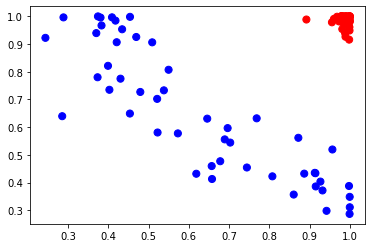

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

# Making the SVM class


### Create an SVM model with RBF kernel

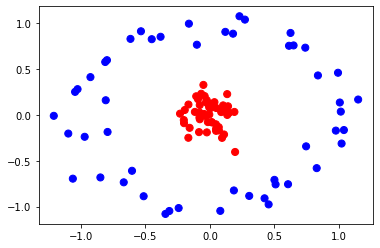

In [20]:
from sklearn.datasets._samples_generator import make_circles
X,y = make_circles(100,factor=.1, noise=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=50,cmap='bwr')

In [21]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.20)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers


class SVM:
    def __init__(self, kernel='linear', degree=3, gamma=3, C=1.0):
        self.kernel = kernel
        self.degree = degree
        self.gamma = gamma
        self.C = C
        self.alpha = None
        self.support_vectors = None
        self.support_vectors_y = None

    def _kernel(self, X1, X2):
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], axis=-1)**2)
        elif self.kernel == 'polynomial':
            return (1 + np.dot(X1, X2.T))**self.degree

    def fit(self, X, y):
        X_train = np.array(X)
        y_train = np.array(y)

        # Compute kernel matrix
        K = self._kernel(X_train, X_train)

        n_samples, n_features = X_train.shape

        P = matrix(np.outer(y_train, y_train) * K)
        q = matrix(-np.ones((len(X_train), 1)))
        G_arg = np.vstack((-np.identity(n_samples), np.identity(n_samples)))
        G = matrix(np.vstack((G_arg, np.zeros((2 * n_samples, n_samples)))))
        h = matrix(np.vstack(((np.zeros((2*n_samples, 1))), np.full((2*n_samples, 1), self.C))))

        A = matrix(np.ones((1, n_samples)) * y_train, (1, n_samples))

        b = matrix(0.0)
        # Solve QP problem
        solvers.options['show_progress'] = False
        alpha = np.array(solvers.qp(P, q, G, h, A, b)['x']).ravel()

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5
        ind = np.arange(len(alpha))[sv]
        self.alpha = alpha[sv]
        self.support_vectors = X[sv]
        self.support_vectors_y = y[sv]

    def predict(self, X):
        y_predict = np.zeros((len(X)))
        for i in range(len(X)):
            s = 0
            for a, sv_y, sv in zip(self.alpha, self.support_vectors_y, self.support_vectors):
                if self.kernel == 'linear':
                    s += a * sv_y * np.dot(X[i], sv)
                elif self.kernel == 'rbf':
                    s += a * sv_y * np.exp(-self.gamma * np.linalg.norm(X[i] - sv)**2)
                elif self.kernel == 'polynomial':
                    s += a * sv_y * (1 + np.dot(X[i], sv))**self.degree
            y_predict[i] = self.sign(s)
        return y_predict

    def sign(self, a):
        if a >= 0:
            return 1
        else:
            return -1


### linear kernal

In [42]:
svm_linear = SVM(kernel='linear', C=10)


In [43]:
svm_linear.fit(X_train, y_train)


In [44]:
y_pred_linear = svm_linear.predict(X_test)

In [45]:
acc_linear = accuracy_score(y_test, y_pred_linear)

In [46]:
print("Accuracy score (linear kernel):", acc_linear)


Accuracy score (linear kernel): 0.6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


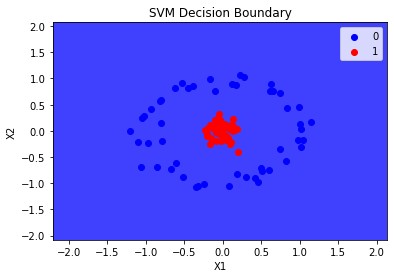

In [47]:
plot_decision_boundary(X, y, svm_linear)

### rbf kernel

In [48]:
svm_rbf = SVM(kernel='rbf')

In [49]:
svm_rbf.fit(X_train, y_train)

In [50]:
y_pred_rbf = svm_rbf.predict(X_test)

In [51]:
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [52]:
print("Accuracy score (rbf kernel):", acc_rbf)

Accuracy score (rbf kernel): 0.6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


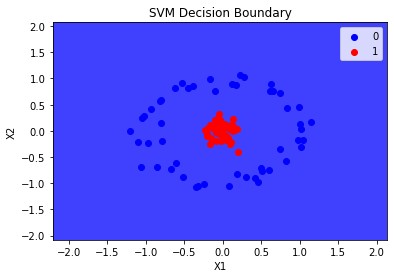

In [53]:
plot_decision_boundary(X, y, svm_rbf)

### polynomial kernal

In [54]:
svm_polynomial = SVM(kernel='polynomial')

In [55]:
svm_polynomial.fit(X_train, y_train)

In [56]:
y_pred_polynomial = svm_polynomial.predict(X_test)

In [57]:
acc_polynomial = accuracy_score(y_test, y_pred_polynomial)

In [58]:
print("Accuracy score (rbf kernel):", acc_polynomial)

Accuracy score (rbf kernel): 0.6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


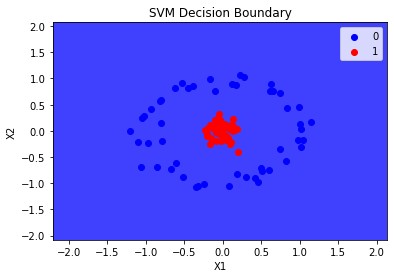

In [59]:
plot_decision_boundary(X, y, svm_polynomial)